## Machine learing approaches to discovery USP21 inhibitors
The dataset was downloaded from Bioassay Pubchem: https://pubchem.ncbi.nlm.nih.gov/gene/USP2/human#section=Tested-Compounds. 

## Import data and caculate molecular description by pandel

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-05-30 14:24:32--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-05-30 14:24:32--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   114MB/s    in 0.2s    

2022-05-30 14:24:33 (114 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-05-30 14:24:33--  https://github

In [ ]:
!unzip padel.zip 

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
url = "https://raw.githubusercontent.com/NguyenTanKhanh/Drug-discovery_khanh/main/USP/data%20test%20%20no%20Lin.csv"
#url = "https://raw.githubusercontent.com/NguyenTanKhanh/Drug-discovery_khanh/main/USP/data%20model.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df

,ID,Smiles
0,1,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=N[NH]3)\C=...
1,2,CC1=NC(=C(O)C2=C1C=C(OC3=CC=CC=C3)C=C2)C(=O)NC...
2,3,C[N]1C=NC2=C(F)C(=C(C=C12)C(=O)NOCCO)NC3=CC=C(...
3,4,CN(C)C/C=C/C(=O)NC1=CC2=C(NC3=CC=C(F)C(=C3)Cl)...
4,5,CC(C)CC(NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN=C2...
...,...,...
1947,1948,CC1(C)SC2C(N)C(=O)N2C1C(O)=O
1948,1949,N[C]12C[CH]3[CH2]C([CH2][CH](C3)C1)C2
1949,1950,CCN(C1CCOCC1)C2=C(C)C(=CC(=C2)C3=CC=C(CN4CCOCC...
1950,1951,COC1=C(NC2=NC(=C(Cl)C=N2)NC3=CC=CC=C3[P](C)(C)...


In [ ]:
selection = ['Smiles','ID']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi 

CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=N[NH]3)\C=C\C4=CC=CC=N4	1
CC1=NC(=C(O)C2=C1C=C(OC3=CC=CC=C3)C=C2)C(=O)NCC(O)=O	2
C[N]1C=NC2=C(F)C(=C(C=C12)C(=O)NOCCO)NC3=CC=C(Br)C=C3Cl	3
CN(C)C/C=C/C(=O)NC1=CC2=C(NC3=CC=C(F)C(=C3)Cl)N=CN=C2C=C1OC4CCOC4	4
CC(C)CC(NC(=O)C(CC1=CC=CC=C1)NC(=O)C2=NC=CN=C2)B(O)O	5
CC1=NC(=CC(=N1)N2CCN(CCO)CC2)NC3=NC=C(S3)C(=O)NC4=C(Cl)C=CC=C4C	6
COC1=C(OCCCN2CCOCC2)C=C3C(=NC=NC3=C1)NC4=CC=C(F)C(=C4)Cl	7
NC1=C2CN(C3CCC(=O)NC3=O)C(=O)C2=CC=C1	8
CC1=C(CCNCC2=CC=C(\C=C\C(=O)NO)C=C2)C3=C([NH]1)C=CC=C3	9
ONC(=O)CCCCCCC(=O)NC1=CC=CC=C1	10
NC1=CC=CC=C1NC(=O)C2=CC=C(CNC(=O)OCC3=CN=CC=C3)C=C2	11
FC1=C(C=C(CC2=NNC(=O)C3=C2C=CC=C3)C=C1)C(=O)N4CCN(CC4)C(=O)C5CC5	12
CN1CCN(CC1)CC2=CC=C(C=C2)C(=O)NC3=CC(=C(C)C=C3)NC4=NC(=CS4)C5=CC=CN=C5	13
CC(OC1=C(N)N=CC(=C1)C2=C[N](N=C2)C3CCNCC3)C4=C(Cl)C=CC(=C4Cl)F	14
C[S](=O)(=O)C1=CC=C(C(=C1)Cl)C(=O)NC2=CC(=C(Cl)C=C2)C3=NC=CC=C3	15
ONC(=O)/C=C/C1=CC(=CC=C1)[S](=O)(=O)NC2=CC=CC=C2	16
CC(C)OC(=O)C(C(=O)OC(C)C)=C1SC=CS1	17
CC(C)(C)C1=CC(=C(NC(=O)C2=

In [ ]:
! bash padel.sh

Processing 1 in molecule.smi (1/1898). 
Processing 2 in molecule.smi (2/1898). 
Processing 3 in molecule.smi (3/1898). Average speed: 9.10 s/mol.
Processing 4 in molecule.smi (4/1898). Average speed: 4.60 s/mol.
Processing 5 in molecule.smi (5/1898). Average speed: 3.37 s/mol.
Processing 6 in molecule.smi (6/1898). Average speed: 2.71 s/mol.
Processing 7 in molecule.smi (7/1898). Average speed: 2.21 s/mol.
Processing 8 in molecule.smi (8/1898). Average speed: 2.03 s/mol.
Processing 9 in molecule.smi (9/1898). Average speed: 1.77 s/mol.
Processing 10 in molecule.smi (10/1898). Average speed: 1.61 s/mol.
Processing 11 in molecule.smi (11/1898). Average speed: 1.50 s/mol.
Processing 12 in molecule.smi (12/1898). Average speed: 1.38 s/mol.
Processing 13 in molecule.smi (13/1898). Average speed: 1.34 s/mol.
Processing 14 in molecule.smi (14/1898). Average speed: 1.35 s/mol.
Processing 16 in molecule.smi (16/1898). Average speed: 1.14 s/mol.
Processing 15 in molecule.smi (15/1898). Average s

In [ ]:
df_padel = pd.read_csv('descriptors_output.csv')

In [ ]:
df_padel

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1892,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894,1895,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1895,1896,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1896,1898,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Sort by ascending name
df_padel_2 = df_padel.sort_values('Name')
df_padel_2

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1894,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894,1895,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1895,1896,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1897,1897,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_padel_2

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
1,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1892,1894,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1894,1895,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1895,1896,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1897,1897,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df_padel_2.to_csv('acetylcholinesterase_2.0.csv', index=False)
df_padel_2.to_csv('USP.csv', index=False)

## Data preparation for building model


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url_1 = "https://raw.githubusercontent.com/NguyenTanKhanh/Drug-discovery_khanh/main/USP/USP.csv"

In [ ]:
data = pd.read_csv(url_1)

In [ ]:
data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,Name,Class
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,1
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3,1
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1653,0
1653,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1654,0
1654,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1655,0
1655,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1656,0


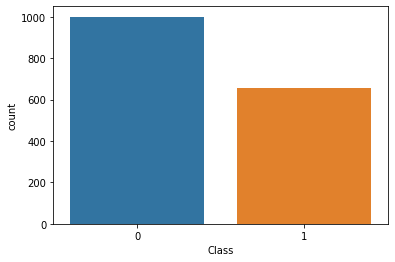

In [ ]:
import seaborn as sns

ax = sns.countplot(x="Class",data=data)

## Data preparation for test model

In [ ]:
url_2 = "https://raw.githubusercontent.com/NguyenTanKhanh/Drug-discovery_khanh/main/USP/USP%20datatest.csv"
#url_2 = "https://raw.githubusercontent.com/NguyenTanKhanh/Drug-discovery_khanh/main/USP/data%20test%20no%20Lin_caculated.csv"

In [ ]:
df_test_X = pd.read_csv(url_2)
df_test_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1984,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,1985,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,1986,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,1987,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_X = df_test_X.drop(columns=['Name'])
df_test_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1984,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1985,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1986,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test_x = df_test_X.values

In [ ]:
df_test_x

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
np.isnan(df_test_x.any()) #and gets False
np.isfinite(df_test_x.all()) #and gets True

True

## Prepare for LazyPrediction

> Văn bản được thụt lề



In [ ]:
df = data.values

In [ ]:
df.shape

(1657, 883)

In [ ]:
X = df[:,0:881]

In [ ]:
X.shape

In [ ]:
Y_binary = df[:,-1]


In [ ]:
Y_binary.shape

(1657,)

In [ ]:
Y_binary

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y_binary,test_size=.5,random_state =123)
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
X, Y_binary, test_size=0.2, random_state=0)

## Run Lazypredict

In [ ]:
pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(features_train, features_test, target_train, target_test)

print(models)

100%|██████████| 29/29 [00:31<00:00,  1.10s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.93               0.92     0.92      0.93   
RandomForestClassifier             0.93               0.92     0.92      0.93   
LGBMClassifier                     0.92               0.92     0.92      0.92   
XGBClassifier                      0.91               0.91     0.91      0.91   
BaggingClassifier                  0.90               0.89     0.89      0.90   
SVC                                0.89               0.87     0.87      0.89   
LogisticRegression                 0.87               0.87     0.87      0.87   
PassiveAggressiveClassifier        0.86               0.86     0.86      0.86   
Perceptron                         0.86               0.86     0.86      0.86   
NuSVC                              0.88               0.86     0.86      0.87   
SGDClassifier               

In [ ]:
lazy_result = pd.DataFrame(models)
lazy_result

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.92,0.92,0.93,0.49
RandomForestClassifier,0.93,0.92,0.92,0.93,1.07
LGBMClassifier,0.92,0.92,0.92,0.92,0.78
XGBClassifier,0.91,0.91,0.91,0.91,12.24
BaggingClassifier,0.90,0.89,0.89,0.90,0.54
SVC,0.89,0.87,0.87,0.89,2.32
LogisticRegression,0.87,0.87,0.87,0.87,0.26
PassiveAggressiveClassifier,0.86,0.86,0.86,0.86,0.56
Perceptron,0.86,0.86,0.86,0.86,0.26


In [ ]:
lazy_result.to_csv("lazy_result.csv", index = False)

## Top 5 models were selected following Lazypredict result. 
ExtraTreesClassifier, RandomForestClassifier, LGBMClassifier, XGBClassifier, BaggingClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

## 1. ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf_1 = ExtraTreesClassifier(n_estimators=100, random_state=0).fit(features_train, target_train)

In [ ]:
clf_1.score(features_test,target_test)

0.9186746987951807

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


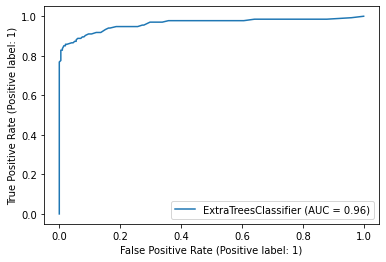

In [ ]:
metrics.plot_roc_curve(clf_1, features_test, target_test)
plt.show()

In [ ]:
y_pred = clf_1.predict(features_test)
confusion_matrix( target_test, y_pred)

array([[188,  10],
       [ 17, 117]])

Dataset prediction

In [ ]:
result_ExtraTreesClassifier = clf_1.predict(df_test_x)

In [ ]:
result_ExtraTreesClassifier = pd.DataFrame(result_ExtraTreesClassifier, columns = ['Column_A'])

In [ ]:
result_ExtraTreesClassifier

,Column_A
0,0
1,0
2,0
3,0
4,0
...,...
1983,0
1984,0
1985,0
1986,1


In [ ]:
result_ExtraTreesClassifier.to_csv("result_ExtraTreesClassifier.csv", index = False)

## 2. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(max_depth=2, random_state=0).fit(features_train, target_train)

In [ ]:
clf_2.score(features_test,target_test) 

0.7831325301204819

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


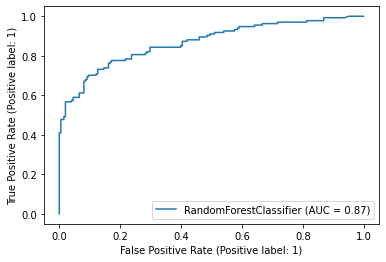

In [ ]:
metrics.plot_roc_curve(clf_2, features_test, target_test)
plt.show()

In [ ]:
y_pred = clf_2.predict(features_test)
confusion_matrix( target_test, y_pred)

array([[195,   3],
       [ 69,  65]])

Dataset prediction

In [ ]:
result_RandomForestClassifier = clf_2.predict(df_test_x)

In [ ]:
result_RandomForestClassifier = pd.DataFrame(result_RandomForestClassifier, columns = ['Column_A'])

In [ ]:
result_RandomForestClassifier

,Column_A
0,0
1,0
2,0
3,0
4,0
...,...
1983,0
1984,0
1985,0
1986,0


In [ ]:
result_RandomForestClassifier.to_csv("result_RandomForestClassifier.csv", index = False)

## 3. LGBMClassifier

In [ ]:
import lightgbm as lgb
clf_3 = lgb.LGBMClassifier()
clf_3.fit(features_train, target_train)

LGBMClassifier()

In [ ]:
clf_3.score(features_test,target_test) 

0.9156626506024096

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


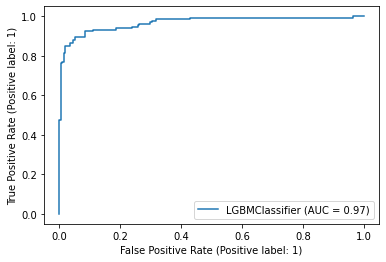

In [ ]:
metrics.plot_roc_curve(clf_3, features_test, target_test)
plt.show()

In [ ]:
y_pred = clf_3.predict(features_test)
confusion_matrix( target_test, y_pred)

array([[181,  17],
       [ 11, 123]])

Dataset prediction

In [ ]:
result_LGBMClassifier = clf_3.predict(df_test_x)

In [ ]:
result_LGBMClassifier = pd.DataFrame(result_LGBMClassifier, columns = ['Column_A'])

In [ ]:
result_LGBMClassifier

,Column_A
0,1
1,0
2,0
3,0
4,0
...,...
1983,0
1984,0
1985,0
1986,1


In [ ]:
result_LGBMClassifier.to_csv("result_LGBMClassifier.csv", index = False)

## 4. XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf_4 = XGBClassifier().fit(features_train, target_train)

In [ ]:
clf_4.score(features_test,target_test) 

0.8855421686746988

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


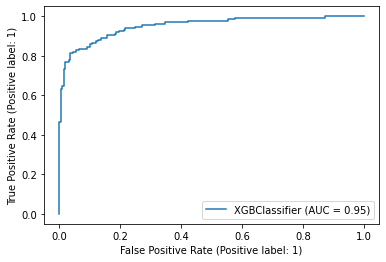

In [ ]:
metrics.plot_roc_curve(clf_4, features_test, target_test)
plt.show()

In [ ]:
y_pred = clf_4.predict(features_test)
confusion_matrix( target_test, y_pred)

array([[182,  16],
       [ 22, 112]])

Dataset prediction

In [ ]:
result_XGBClassifier = clf_2.predict(df_test_x)

In [ ]:
result_XGBClassifier = pd.DataFrame(result_XGBClassifier, columns = ['Column_A'])

In [ ]:
result_XGBClassifier

,Column_A
0,0
1,0
2,0
3,0
4,0
...,...
1983,0
1984,0
1985,0
1986,0


In [ ]:
result_XGBClassifier.to_csv("result_XGBClassifier.csv", index = False)

## 5.  BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf_5 = BaggingClassifier(random_state=0).fit(features_train, target_train)

In [ ]:
clf_5.score(features_test,target_test)

0.8975903614457831

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


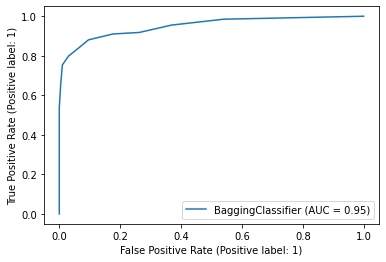

In [ ]:
metrics.plot_roc_curve(clf_5, features_test, target_test)
plt.show()

In [ ]:
y_pred = clf_5.predict(features_test)
confusion_matrix( target_test, y_pred)

array([[186,  12],
       [ 22, 112]])

Data prediction

In [ ]:
result_BaggingClassifier = clf_5.predict(df_test_x)

In [ ]:
result_BaggingClassifier = pd.DataFrame(result_BaggingClassifier, columns = ['Column_A'])

In [ ]:
result_BaggingClassifier

,Column_A
0,1
1,0
2,1
3,0
4,0
...,...
1983,1
1984,0
1985,0
1986,1


In [ ]:
result_BaggingClassifier.to_csv("result_BaggingClassifier.csv", index = False)

## Prepare for Deep learning model

In [ ]:
df = data.values

In [ ]:
df.shape

In [ ]:
X = df[:,0:881]

In [ ]:
X.shape

In [ ]:
Y_binary = df[:,-1]
#Y_binary = df[:,-2]

In [ ]:
Y_binary.shape

In [ ]:
Y_binary

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling1D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf 

In [ ]:
values = array(Y_binary)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

In [ ]:
onehot_encoded.shape

In [ ]:

onehot_encoded = np.array(onehot_encoded, dtype=np.float)

In [ ]:
X = np.array(X, dtype=np.float)
X

In [ ]:

Y = onehot_encoded
print(Y)
print(Y.shape)

In [ ]:
print(X)
print(X.shape)

##Deep learning model

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(
X, Y, test_size=0.2, random_state=0)

In [ ]:
num_classes = 2
learning_rate = 0.0001
training_epochs = 500
batch_size = 25

In [ ]:
features_train.shape

In [ ]:
features_test.shape

In [ ]:
target_train.shape

In [ ]:
target_test.shape

In [ ]:
features_train_X = np.expand_dims(features_train, axis=2)
features_test_X = np.expand_dims(features_test, axis=2)

In [ ]:
features_train_X.shape

In [ ]:
features_test_X.shape

In [ ]:
input_shape = (881,1)

In [ ]:
model = Sequential()

## for yoon # Input size should be [batch, 1d, 2d, ch] = (None, 1, 15000, 1)
#model.add(Conv1D (kernel_size = 11, filters = 16, input_shape=(train_X.shape[1],train_X.shape[2]), padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 16, input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))

model.add(Flatten())

model.add(Dense (1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax',activity_regularizer=keras.regularizers.l2()  ))
model.compile( loss='categorical_crossentropy', optimizer= tf.optimizers.Adam(), metrics=['accuracy'])
#model.compile( loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])



model.summary()

In [ ]:
target_train.shape

In [ ]:
target_test.shape

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
from keras.callbacks import ModelCheckpoint
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
checkpoint_path = '/content/drive/MyDrive/USP21/cp.cktp'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weight_only = True, verbose = 1)

In [ ]:
model_train = model.fit(features_train_X, target_train, batch_size=batch_size,epochs=training_epochs,verbose=1,
                        callbacks=[cp_callback], # Checkpoint
                        validation_data=(features_test_X, target_test))

In [ ]:
model.save_weights('/content/drive/My Drive/USP')

In [ ]:
model.load_weights('/content/drive/My Drive/USP')

In [ ]:
model.save('/content/drive/My Drive/USPModel')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Get training and test loss histories
training_loss = model_train.history["accuracy"]
test_loss = model_train.history["val_accuracy"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.show();

In [ ]:
# Get training and test loss histories
training_loss = model_train.history["loss"]
test_loss = model_train.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [ ]:
y_pred = model.predict(features_test_X)


In [ ]:
confuxsion = pd.DataFrame(y_pred, columns = ['Column_A','Column_B'])

In [ ]:
confuxsion.to_csv('confuxsion.csv', index=False)

## TEST DATA FOR DEEP LEARNING

In [ ]:
import pandas as pd

In [ ]:
url_2 = "https://raw.githubusercontent.com/NguyenTanKhanh/Drug-discovery_khanh/main/USP/USP%20datatest.csv"

In [ ]:
df_test_X = pd.read_csv(url_2)
df_test_X

In [ ]:
df_test_X = df_test_X.drop(columns=['Name'])
df_test_X

In [ ]:
df_test_x = df_test_X.values

In [ ]:
df_test_x

In [ ]:
df_predict_x = np.expand_dims(df_test_x, axis=2)

In [ ]:
df_predict_x.shape

In [ ]:
test = model.predict(df_predict_x)
test

In [ ]:
#model.predict(df_predict_x)
#np.argmax(df_predict_x,axis=1)

In [ ]:
result = pd.DataFrame(test, columns = ['Column_A','Column_B'])

In [ ]:
result.to_csv('result.csv', index=False)